# Building PGMs for the paper using daft

In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import sys
rc("font", family="serif", size=10)
rc("text", usetex=True)

import daft

## Model

For a single star, we have:

\begin{equation}
p(P_s, \theta\ |\ \mathcal{D}) = p(\mathcal{D}\ |\ \theta)\ p(\theta\ |\ Q_WMB)\ p(Q_WMB)\, ,\text{where}\\
p(\mathcal{D}\ |\ \theta) = \mathcal{N}(\mathcal{D} - \theta, \sigma_{\mathcal{D}})\, ,\\
p(\theta\ |\ Q_WMB) = Q_WMB\ \text{KDE}_WMB(\theta) + (1-Q_WMB)\text{KDE}_{s}(\theta)\, ,\\
p(P_s) = U(0, 1)\, ,
\end{equation}

where $\theta$ are latent parameters for mass, temperature, age and rotation ($\theta = \{M, T_{\rm eff}, \tau, P\}$), drawn from a mixture model of two Kernel Density Estimates (KDEs), modulated by a mixture parameter $P_s$.

In [2]:
#Instantiate the PGM
sy = 1.
sx = 1.
pgm = daft.PGM(shape=[2.5*sx,2.7*sy])

# Ps
pgm.add_node(daft.Node("Ps", r"$Q_{\rm WMB}$", 1.5*sx, 2.5*sy, fontsize=7))

#p(theta | Ps, KDEs, KDEro)
pgm.add_node(daft.Node("theta", r"$\theta$", 1.5*sx, 1.5*sy))
pgm.add_node(daft.Node("KDEs", r"$\kappa_{\rm s}$", 0.5*sx, 1.5*sy, offset=(0,-5), fixed=True))
pgm.add_node(daft.Node("KDEro", r"$\kappa_{\rm WMB}$", 2.5*sx, 1.5*sy, offset=(0,-5), fixed=True))

#p(D | theta)
pgm.add_node(daft.Node("D", r"$\mathcal{D}$", 1.5*sx, 0.5*sy, observed=True))
pgm.add_node(daft.Node("sigD", r"$\sigma_{\mathcal{D}}$", 2.5*sx, 0.5*sy, offset=(0, -5), fixed=True))

# #Add in edges
pgm.add_edge('Ps','theta')
pgm.add_edge('KDEs', 'theta')
pgm.add_edge('KDEro', 'theta')
pgm.add_edge('theta', 'D')
pgm.add_edge('sigD', 'D')

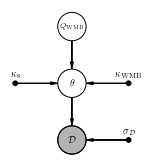

In [3]:
pgm.render()
pgm.figure.savefig('natastron/2nd_draft/Images/pgm_models.pdf')
# pgm.figure.savefig("/Users/Oliver/PhD/arcanum/Chapters/6_Chapter/Images/pgm_models.pdf")
# pgm.figure.savefig("pgm_models.pdf")
pgm.figure.savefig("natastron/Publication/Images/pgm_models.jpg", dpi=300)
plt.show()